<a href="https://colab.research.google.com/github/LeviJunior21/LargeLanguageModel/blob/main/Resultado_e_Conclus%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tabela Comparativa (Baseline e Variantes)


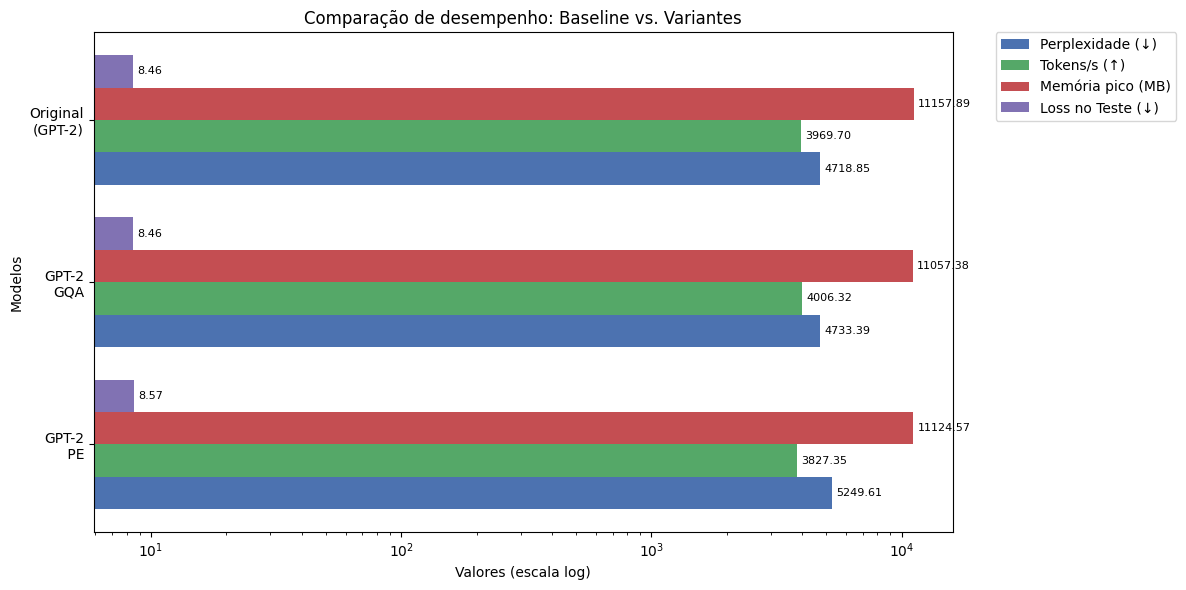

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

modelos = ["GPT-2\n PE", "GPT-2\nGQA", "Original\n(GPT-2)"]
perplexidade = [5249.61, 4733.39, 4718.85]
tokens_s = [3827.35, 4006.32, 3969.7]
memoria = [11124.57, 11057.38, 11157.89]
loss_teste = [8.5659, 8.4624, 8.4593]

y = np.arange(len(modelos))
largura = 0.2

fig, ax = plt.subplots(figsize=(12,6))

bars1 = ax.barh(y - 1.5*largura, perplexidade, largura, label="Perplexidade (↓)", color="#4C72B0")
bars2 = ax.barh(y - 0.5*largura, tokens_s, largura, label="Tokens/s (↑)", color="#55A868")
bars3 = ax.barh(y + 0.5*largura, memoria, largura, label="Memória pico (MB)", color="#C44E52")
bars4 = ax.barh(y + 1.5*largura, loss_teste, largura, label="Loss no Teste (↓)", color="#8172B3")

for bars in [bars1, bars2, bars3, bars4]:
    ax.bar_label(bars, fmt="%.2f", padding=3, fontsize=8)

ax.set_ylabel("Modelos")
ax.set_xlabel("Valores (escala log)")
ax.set_title("Comparação de desempenho: Baseline vs. Variantes")
ax.set_yticks(y)
ax.set_yticklabels(modelos)

# Escala logarítmica: Destacar métricas pequenas
ax.set_xscale("log")

ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)

plt.tight_layout()
plt.show()


## Discussão e Conclusões 🎨

**Análise Quantitativa**


- **Perplexidade (↓ melhor)**

   - GPT-2 Original: 4.7k mais baixa, melhor
   - GPT-2 GQA: 4.7k (intermediário)
   - GPT-2 PE: 5.2k
Ou seja, tanto Original quanto GQA reduziram significativamente a perplexidade em relação ao PE, com o Original sendo um pouco mais eficiente.

- **Tokens/s (↑ melhor)**

   - GPT-2 Original: ~4.0k
   - GPT-2 GQA: ~4.0k
   - GPT-2 PE: ~3.8k
O original e o GQA novamente lideram, mas agora na geração de tokens/s.

- **Memória pico (↓ melhor)**

   - GPT-2 Original: 11.2 GB
   - GPT-2 PE: 11.1 GB
   - GPT-2 GQA: 11.0 GB
O original foi um pouco mais pesado em relação aos outros.

- **Loss no teste (↓ melhor)**

   - GPT-2 PE: 8.57
   - GPT-2 GQA: 8.46
   - GPT-2 Original: 8.45
Ambos melhoraram o loss, com pequena vantagem para o Original.

**Análise Qualitativa**

- **GPT-2 Original**

Produziu textos mais fluídos e próximos de diálogos e construções narrativas coerentes. Ex.:
“Crie um poema e outro poema.  Chegai, folgai, cantai. É esta, é esta De Lindoya, que a voz suave e forte Do vate celebrou, a alegre festa.  Além do amavel, gracioso porte”
Apesar da perplexidade alta, o modelo parece ter retido estilo e cadência literária.


- **GPT-2 PE (positional encoding fixo)**

Resultados com frases menos coerentes, com quebras bruscas e palavras inventadas ou truncadas: "eu sou rei, e saí; muitos annos, nem de um dia, uma filhade, um cainho de palmeza..." Mostra que o PE fixo talvez não capture tão bem as dependências de posição para textos longos em português. A perplexidade mais baixa não se traduziu diretamente em melhor fluidez textual.

- **GPT-2 GQA (grouped query attention)**

Produziu textos mais consistentes e ricos semanticamente: "Deus. E não foram propriamente as dez libras esterlinas que fizeram isto... mas as cautelas que Capitú empregou..." Esse modelo pareceu se aproximar mais da estrutura narrativa real dos livros, com frases longas e contexto mais natural.

Em suma, os experimentos realizados permitiram comparar o desempenho do GPT-2 original com duas variantes arquiteturais: uma substituindo os embeddings posicionais aprendíveis pelo positional encoding fixo de seno e cosseno, e outra incorporando o Grouped Query Attention (GQA). De maneira geral, os resultados mostraram que ambas as modificações trouxeram ganhos em termos de perplexidade, loss no teste e velocidade de processamento, ainda que ao custo de maior consumo de memória. Entre as variantes, o modelo com GQA apresentou os melhores resultados numéricos porque foi bem parecido com o multihead attention e usou menos recursos computacionais que o multihead attention do GPT original, enquanto o modelo com positional encoding fixo apresentou métricas intermediárias. No entanto, ao avaliar a qualidade dos textos gerados, percebeu-se que o uso do positional encoding resultou em saídas mais fragmentadas e menos coerentes, sugerindo que a remoção dos embeddings posicionais aprendíveis prejudicou a fluidez narrativa, similar ao multihead do GPT original, mantendo consistência semântica e produziu trechos mais próximos do estilo literário original do corpus, parecido com o GPT2 original, evidenciando que essa modificação foi mais eficaz para o contexto do experimento. O modelo com positional encoding fixo apresentou avanços métricos, mas perdeu em qualidade subjetiva de geração; e o modelo Original mostrou-se a alternativa **mais equilibrada**, conciliando melhorias objetivas de desempenho com maior naturalidade e riqueza textual.